Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

#T# Title
#$# Output Test
#># Code

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
#import seaborn as sns

In [62]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    #N# I guessed this below to remove time and set index.
    df.index = pd.to_datetime(df['created']).dt.date
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    df.drop(columns = df.select_dtypes('object').columns, inplace=True)
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [63]:
df = wrangle(filepath)

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [46]:
#T# EXPLORE DATASET
# Conduct your exploratory data analysis here, 
# and then modify the function above.
#N# BLOCKER: I didnt know what this meant exactly. I thought it meant experiment making features.
#N# Actually it is to get a grasp of what's in our dataframe and come up with ideas what to do with it.
#C# df.shape # (48817, 34) (rows/observations,features)
#C# df.info() # shows all columns and Dtypes. #7 ['price'] is our target, or what we're trying to predict.
#C# df.head() # shows there's an index [1,2,3...] and a ['created'] column which we'll want to make our more useful index.
#N# I comment out anything I dont need to run. This has to be a good habit.

#  Int64Index: 48817 entries, 0 to 49351
#  Data columns (total 34 columns):
#  #   Column                Non-Null Count  Dtype  
# ---  ------                --------------  -----  
#  0   bathrooms             48817 non-null  float64

In [92]:
#T# CHECK AFTER DROP OBJECT COLUMNS
#df.info()
#N# Before I removed time.
# DatetimeIndex: 48817 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
# Data columns (total 29 columns):
#   Column                Non-Null Count  Dtype  
# ---  ------                --------------  -----  
#  0   bathrooms             48817 non-null  float64
#  1   bedrooms              48817 non-null  int64  
#  2   latitude              48817 non-null  float64
#  3   longitude             48817 non-null  float64
#  4   price                 48817 non-null  int64  

In [33]:
#T# TEST CREATING FEATURES
#C# Im thinking creating titles (#T#) will help me and others follow my work. It can also differentiate from original comments-#C# or #N#.
#>1# plt.scatter(df['bedrooms'], df['price']) # (x,y)
#>1# plt.xlabel('# Bedrooms')
#>1# plt.ylabel('Monthly Rent'); #N# In general the semicolon does nothing. But if you are using the jupyter notebook (depending on your version), you might get a figure plotted twice (I got technical text above the graph). The semicolon at the end of your plot command prevents this: df.plot();
#N# We've decided this will be our feature as there is maybe a slight amount of correlation.

In [39]:
#T# PAIRPLOTTING TO FIND BETTER MATCH
#># pd.plotting.scatter_matrix(df);
#N# Wait until wrangled or learn to set the y.

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [40]:
#T# SET X & y
X = df[['bedrooms']] #N# [[...]] Makes 2-dimensions. Caps X.
y = df['price'] #N# Lowercase y in 1-dimension.

In [43]:
#># X.shape #N# (48817, 1)
#># y.shape #O# (48817,)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
#T# SPLIT TRAINING SET BY CUTOFF DATE
#N# Training set should all observations from April - May 2016. This will require datetime.
cutoff = X.index < '2016-5-31'
X_train, y_train = X.loc[cutoff],y.loc[cutoff]
X_test, y_test = X.loc[~cutoff],y.loc[~cutoff]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [72]:
#N# Price is a continuous target so will use Linear Regression (Mean_absolute_error)
#N# We need the mean of y as a probably good baseline as its from a range of observations.
#># print('Mean Rent:', y.mean() ) #># Mean Rent: 3579.5852469426636 #N# I didnt check for outliers.
#># print('Baseline MAE:', baseline_mae) #># Ellipsis

In [73]:
#T# Create a list of predictions where every item is y.mean.
#N# We start with a list of just one item.
y_pred = [y.mean()] * len(y)  #N# Multiplying the mean of y by the length of the target vector y. 
#$# type(y_pred) #># list
#$# type(y) #># pandas.core.series.Series
#$# y_pred[:2] #># [3579.5852469426636, 3579.5852469426636]

In [74]:
baseline_mae = mean_absolute_error(y, y_pred) #N# y is the 'true' target.
#># print('Mean Rent:', y.mean() ) #># Mean Rent: 3579.5852469426636
#># print('Baseline MAE:', baseline_mae) #># 1201.532252154329
#N# So if we always predict 3579.58 we would be off by an average of 1201.53
#N# So 1201.53 is the baseline we need to beat with our Linear Regression.


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
#T# INSTANTIATE THE PREDICTOR
#N# "Not just the class but I need to turn it into an object something I can work with"
# Step 1: Import predictor class







In [76]:
# Step 2: Instantiate predictor
model = LinearRegression()

In [77]:
#N# And then once my model is instantiated I need to "fit" it to the data.
#N# So I'll do model dot fit, and then I'll put in my feature matrix (X, ...and my target vector little... y)
# Step 3: Fit predictor on the (training) data
model.fit(X, y) #># LinearRegression(), before doing step 1 above.

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [78]:
#N# What are the performance metrics? How is my model performing
#N# So for that task I need to calculate the mean absolute error.
training_mae = mean_absolute_error(y, model.predict(X) ) # so again I'll start with my true target, little y.
#N# But now I put in my models predictions, model dot predict, big X
#N# So basically "Predict everything and compare that to your target."

print('Training MAE:', training_mae) #># Training MAE: 975.6496767374882
#N# We can see the traning MAE, the performance on the training set, the data we used to fit our model...
#N# ...is 975 which beats our baseline, it has value. 

Training MAE: 975.6496767374882


In [84]:
#T# ASSIGN INTERCEPT TO A VARIABLE

#N# First we've created a Linear Model. That means our model makes predictions using an equation that looks like... 
#N# ...apt price = intercept + coefficient x your feature.
#N# intercept_ coef_ the underscore means you can access these attributes after youve fit your model. 
#C# model.intercept_ #># 2267.9876881787923
#C# intercept = round(model.intercept_, 2) #N# 2267.99
#C# type(intercept) #># numpy.float64

numpy.float64

In [88]:
#T# ASSIGN COEFFICIENT TO A VARIABLE

#C# model.coef_ #># array([853.26640848])
#N# We dont get a float this time, we get an array with a float inside it.
#C# type(model.coef_) #># numpy.ndarray
#N# We can pull that float out with brackets.
#C# model.coef_[0] #># 853.2664084832675
#C# coef = round(model.coef_[0],2) #N# 853.27

853.27

In [91]:
#T# PRINT INTERCEPT WITH COEFFICIENT
intercept = round(model.intercept_, 2) #N# 2267.99
coef = round(model.coef_[0],2) #N# 853.27
#C# print(intercept, coef) #># 2267.99 853.27
#N# "Format String"
print(f'price = {intercept} + {coef} * bedrooms') #># price = 2267.99 + 853.27 * bedrooms


price = 2267.99 + 853.27 * bedrooms


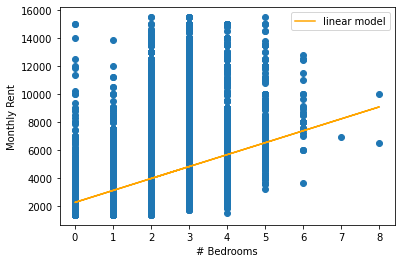

In [95]:
#N# From task 2 above.
#C# plt.scatter(df['bedrooms'], df['price']) # (X,y)
#N# Since we assigned df bedrooms and price to X and y we can sub them... 
plt.scatter(X, y)
#N# And then we can put in our line.
plt.plot(X, model.predict(X), color='orange', label='linear model'  ) #N# We put X because we're using # of bedrooms to predict price.
#N# But instead of y we use model
plt.xlabel('# Bedrooms')
plt.ylabel('Monthly Rent')
plt.legend();

In [ ]:
test_mae = ...

print('Test MAE:', test_mae)

**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = ...
test_r2 = ...

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.